<a href="https://colab.research.google.com/github/toussyn/pharm_sales_prediction/blob/master/notebooks/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

train = pd.read_csv("My Drive/10X/Week3/train.csv", parse_dates = True, low_memory=False)
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
sum(train['Customers'])

644041755

In [4]:
# data extraction
train['Year'] = pd.DatetimeIndex(train['Date']).year
train['Month'] = pd.DatetimeIndex(train['Date']).month
train['Day'] = pd.DatetimeIndex(train['Date']).day
train['WeekOfYear'] = pd.DatetimeIndex(train['Date']).weekofyear
train['DayOfYear'] = pd.DatetimeIndex(train['Date']).day_of_year

# adding new variable
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [5]:
#checking the types
train.dtypes

Store                int64
DayOfWeek            int64
Date                object
Sales                int64
Customers            int64
Open                 int64
Promo                int64
StateHoliday        object
SchoolHoliday        int64
Year                 int64
Month                int64
Day                  int64
WeekOfYear           int64
DayOfYear            int64
SalePerCustomer    float64
dtype: object

In [6]:
# checking null values
train.isnull().sum()

Store                   0
DayOfWeek               0
Date                    0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
WeekOfYear              0
DayOfYear               0
SalePerCustomer    172869
dtype: int64

In [7]:
train.shape

(1017209, 15)

In [8]:
store = pd.read_csv("My Drive/10X/Week3/store.csv")
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


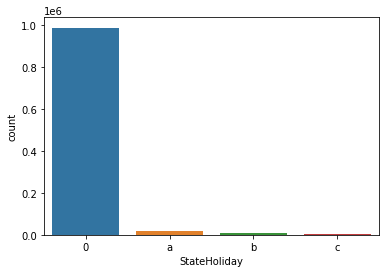

In [9]:
sns.countplot(x ='StateHoliday', data = train)

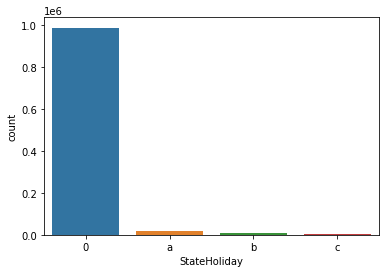

In [10]:
train['StateHoliday'] = train['StateHoliday'].replace({'0': 0})

sns.countplot(x ='StateHoliday', data = train)

In [11]:
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(train['StateHoliday'])):
    
    if train['StateHoliday'][i] not in visited: 
        
        visited.append(train['StateHoliday'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values :",
      visited)

No.of.unique values : 4
unique values : [0, 'a', 'b', 'c']


In [12]:
# loading tranig data into df
test = pd.read_csv("My Drive/10X/Week3/test.csv", parse_dates = True, index_col = 'Date')
test.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0
2015-09-17,2,3,4,1.0,1,0,0
2015-09-17,3,7,4,1.0,1,0,0
2015-09-17,4,8,4,1.0,1,0,0
2015-09-17,5,9,4,1.0,1,0,0


In [13]:
test.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [14]:
test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [15]:
test.dropna(inplace=True)

In [16]:
test.shape

(41077, 7)

In [17]:
test.isna().sum()

Id               0
Store            0
DayOfWeek        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

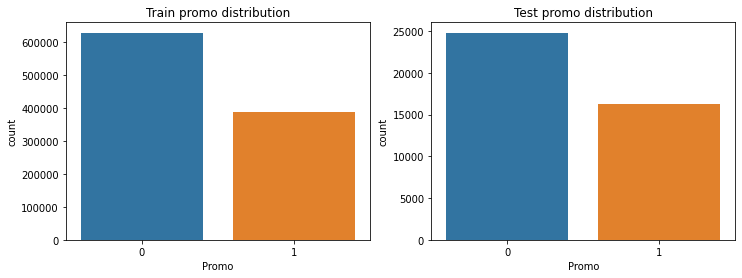

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.countplot(x='Promo', data=train, ax=ax1).set_title('Train promo distribution')
sns.countplot(x='Promo', data=test, ax=ax2).set_title('Test promo distribution')
plt.show()

Though the numbers of rows prensent in the train dataset is significantly larger than that of test, the ratio of promotions looks the same

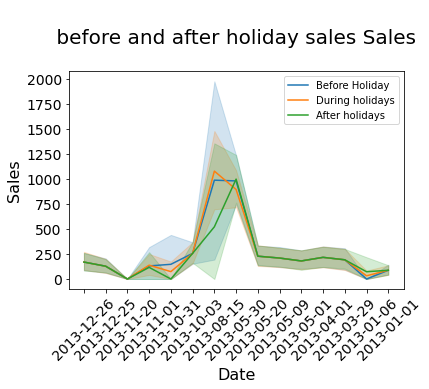

In [19]:
#getting the sales of beroe ; during and after state holiday
df_sh = train[(train['StateHoliday'] != 0) & (train['Date'] < '2014-01-01')]
sh = df_sh.index.tolist()

bsh = []
ash = []
l = max(train.index.tolist())
for i in sh:
  j = i - 1
  k = i + 1
  bsh.append(j)
  if k < l:
    ash.append(k)

#converting before and after indices to df
df_bsh = train.loc[bsh]
df_ash = train.loc[ash]

#removing state holiday remnants from before and after df
df_bsh = df_bsh[df_bsh['StateHoliday'] != 0]
df_ash = df_ash[df_ash['StateHoliday'] != 0]

sns.lineplot(x = df_bsh['Date'], y = df_bsh['Sales'], label='Before Holiday')
sns.lineplot(x = df_sh['Date'], y = df_sh['Sales'], label='During holidays')
sns.lineplot(x = df_ash['Date'], y = df_ash['Sales'], label='After holidays')

plt.title("\n before and after holiday sales Sales \n", size=20)
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Sales", fontsize=16)
plt.show()

Sales during the holidays are higher compared to sales during the day before and after the holidays

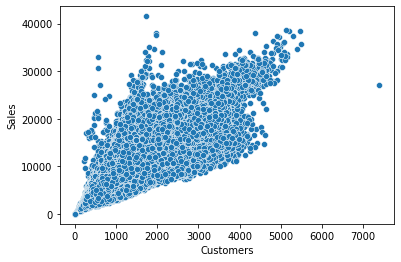

In [20]:
# sales vs customers
sns.scatterplot(data=train, x="Customers", y="Sales")

As the number of customes increases, sales also increases

In [21]:
#sales during promo vs sales without promo
sns.barplot(data=train_store, x="Promo", y="Sales")

NameError: ignored

In [ ]:
#sales during promo vs sales without promo, taking store type into considerstion
sns.barplot(data=train_store, x="StoreType", y="Sales", hue= 'Promo')

In [ ]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')
train_store.head()

In [ ]:
weekday_st = train_store[(train_store['DayOfWeek'] < 5) & (train_store['Open'] == 1)]
weekday_st['Store'].value_counts()